# Исследовательский анализ

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import yaml

import seaborn as sns
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision",6)
pd.set_option("plotting.backend", "matplotlib")

#Для корректного отображения графиков в ноутбуках используется команда %matplotlib inline
%matplotlib inline
# для корректного отображения графиков на тёмном фоне
plt.style.use('default')

In [2]:

from importlib import reload
from dateutil.relativedelta import relativedelta
from datetime import datetime

from scripts.data_scripts.utils import seniority_cats
from scripts.data_scripts import create_features

import scripts.data_scripts.data_prepare as data_prepare
import scripts.data_scripts.fill_na as fill_na
import scripts.data_scripts.fix_errors as fix_errors
import scripts.data_scripts.feature_prepare as fp

reload(data_prepare)
reload(seniority_cats)
reload(fix_errors)
reload(create_features)

<module 'scripts.data_scripts.create_features' from '/home/svs/data/projects/active/urfu/hacaton2/scripts/data_scripts/create_features.py'>

# 1. Загрузка и анализ исходных данных

## 1.1. Загрузка данных

In [3]:
# Пути, где хранятся данные
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir))
f_input = os.path.join("data", "raw", "SF_Mandarin_dataset_ver3_csv.csv")
f_descr =  os.path.join("data", "raw", "SF_Mandarin_dataset_context.csv")
filename = os.path.join(project_path,f_input)
descr_filename = os.path.join(project_path,f_descr)

In [4]:
df = pd.read_csv(filename, sep=';')
df_descr = pd.read_csv(descr_filename, sep=';')

## 1.2. Анализ исходных данных

### Описание признаков

In [5]:
df.head()

,SkillFactory_Id,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1.0,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
1,2.0,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
2,3.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
3,4.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
4,5.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [6]:
df_descr

,Данные заемщика,Параметр,Комментарий
0,Идентификатор заявки,SkillFactory_Id,NaN
1,Дата рождения,BirthDate,NaN
2,Адрес регистрации,-,Исключен из расчета
3,Домашний телефон,-,Исключен из расчета
4,Адрес проживания,-,Исключен из расчета
5,Образование,education,NaN
6,Тип занятости,employment status,NaN
7,Стаж работы,Value,NaN
8,Дата начала работы,JobStartDate,NaN
9,Сфера деятельности,-,Исключен из расчета


### Размер и структура набора данных

In [7]:
print(f'Строк - {df.shape[0]}\nСтолбцов - {df.shape[1]}')

Строк - 8787
Столбцов - 22


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6523 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6566 non-null   float64
 10  Family status      6566 non-null   object 
 11  ChildCount         6566 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

In [9]:
df.describe()

,SkillFactory_Id,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6603.000000,6.603000e+03,6603.000000,6566.000000,6566.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,4388.192640,1.484528e+05,26234.063153,0.309625,0.097320,0.350295,38.794184,76362.108133,12.117219
std,2515.520596,7.742496e+04,22557.993167,0.462374,0.423026,0.477099,23.929860,50978.500496,5.996582
min,1.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2225.500000,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4431.000000,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,6516.500000,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,8787.000000,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


In [10]:
df.describe(include=['object','category'])

,BirthDate,education,employment status,Value,JobStartDate,Position,Family status,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Goods_category
count,6603,6603,6603,6523,6494,6494,6566,6603,6603,6603,6603,6603,6603
unique,2628,10,7,13,288,1131,5,3,3,3,3,3,7
top,1998-04-23 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2012-10-01 00:00:00.0000000,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ,Никогда в браке не состоял(а),success,success,success,success,success,Furniture
freq,20,5296,4858,3615,292,204,4437,4970,4894,4932,4953,4950,976


#### Выводы
Признаки **"Образование", "Тип занятости", "Стаж работы", "Семейное положение", "Срок кредита", "Категория товара", "Код магазина"**  содержат ограниченный набор значений и являются категориальными.
Признаки **"Пол" и "СНИЛС"** являются бинарными. Для них необходимо преобразование в целый тип.
Признак **"Должность"** так сильно поврежден, что однозначно восстановить его невозможно, а некорректное его восстановление привнесет в модель только дополнительный шум и искажение. Поэтому из расчета он будет полностью удален.
Признаки **"Дата рождения", "Дата начала работы"** по смыслу являются датами, но из-за наличия пустых значений интерпретируются неверно. Для них необходимо провести чистку от пустых значений и выполнить преобразование в соответствующий тип. Сами значения даты использоваться в модели не могут, но эти поля будут использованы для генерации других признаков.
Признаки **"Ежемесячный доход", "Ежемесячный расход", "Сумма заказа"** являются числовыми непрерывными, для них необходима стандартизация.
Признаки **"Кол-во детей младше 18 лет" и "Срок кредита"** являются числовыми дискретными, для них необходимо выполнить преобразование к целому типу.

### Дубликаты и пропуски

In [11]:
# Количество дубликатов
df.duplicated().sum()

2183

In [12]:
# Строк с пустыми значениями
df[df.isnull().any(axis=1)].shape[0]

2323

In [13]:
df.isna().sum()

SkillFactory_Id      2184
BirthDate            2184
education            2184
employment status    2184
Value                2264
JobStartDate         2293
Position             2293
MonthProfit          2184
MonthExpense         2184
Gender               2221
Family status        2221
ChildCount           2221
SNILS                2184
BankA_decision       2184
BankB_decision       2184
BankC_decision       2184
BankD_decision       2184
BankE_decision       2184
Merch_code           2184
Loan_amount          2184
Loan_term            2184
Goods_category       2184
dtype: int64

#### Выводы
В данных есть пропуски и дубли, типы данных при загрузке распознаются неверно. Необходимо это исправить.

# 2. Загрузка и анализ данных после предобработки

## 2.1. Данные после 1-го этапа: удаление дублей и заполнение пропусков

In [14]:
f_input1="data/stage_fill_na/dataset.csv"
filename1 = os.path.join(project_path,f_input1)
df1 = pd.read_csv(filename1, sep=';')

In [15]:
# Строк с пустыми значениями
df1[df1.isnull().any(axis=1)].shape[0]

109

In [16]:
# Проверка наличия пропусков
df1.isna().sum()

BirthDate              0
education              0
employment status      0
Value                  0
JobStartDate         109
MonthProfit            0
MonthExpense           0
Gender                 0
Family status          0
ChildCount             0
SNILS                  0
BankA_decision         0
BankB_decision         0
BankC_decision         0
BankD_decision         0
BankE_decision         0
Merch_code             0
Loan_amount            0
Loan_term              0
Goods_category         0
dtype: int64

In [17]:
# Количество дубликатов:
df1.duplicated().sum()

0

### Описание результата
Удалены ненужные признаки "Position" и "SkillFactory_Id".
Пустые значения убраны, кроме столбца "JobStartDate", в котором пустые значение имеют логическое значение, означающее, что человек в данный момент не работает.

## 2.2. Данные после 2-го этапа: приведение типа признаков

In [19]:
f_input2="data/stage_data_prepare/dataset.csv"
filename2 = os.path.join(project_path, f_input2)
df2 = pd.read_csv(filename2, sep=';', parse_dates=['JobStartDate', 'BirthDate'])

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6603 non-null   object        
 4   JobStartDate       6494 non-null   datetime64[ns]
 5   MonthProfit        6603 non-null   int64         
 6   MonthExpense       6603 non-null   int64         
 7   Gender             6603 non-null   int64         
 8   Family status      6603 non-null   object        
 9   ChildCount         6603 non-null   int64         
 10  SNILS              6603 non-null   int64         
 11  BankA_decision     6603 non-null   object        
 12  BankB_decision     6603 non-null   object        
 13  BankC_decision     6603 non-null   object        
 14  BankD_de

In [20]:
df2.head()

,BirthDate,education,employment status,Value,JobStartDate,MonthProfit,MonthExpense,Gender,Family status,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,180000,90000,0,Никогда в браке не состоял(а),0,0,success,success,success,success,denied,77,137000,18,Furniture
1,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,200000,60000,0,Никогда в браке не состоял(а),0,0,success,denied,success,denied,success,27,33000,6,Fitness
2,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,denied,denied,success,success,success,19,165000,24,Medical_services
3,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,success,denied,success,success,success,34,67000,12,Education
4,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,success,denied,success,success,success,75,36000,6,Furniture


### Описание результата
Признаки имеют корректный тип данных, теперь их можно использовать для дальнейшей обработки и формирования новых признаков.

## 2.3. Данные после 3-го этапа: исправление аномалий и выбросов

### Анализ признаков

#### Анализ категориальных данных

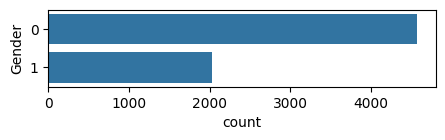

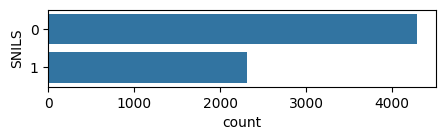

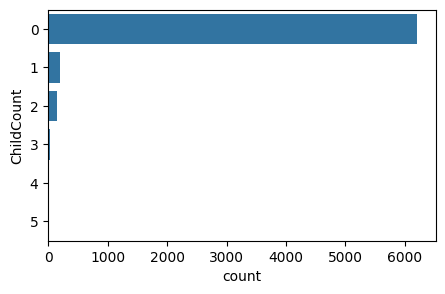

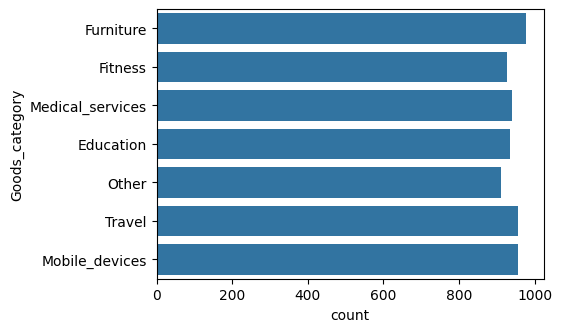

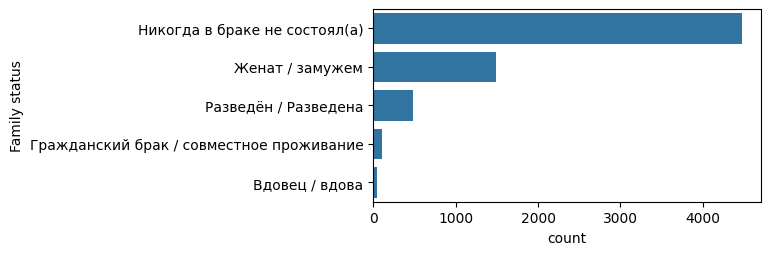

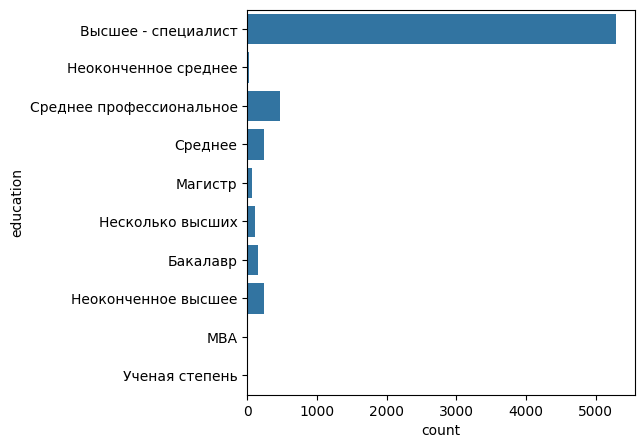

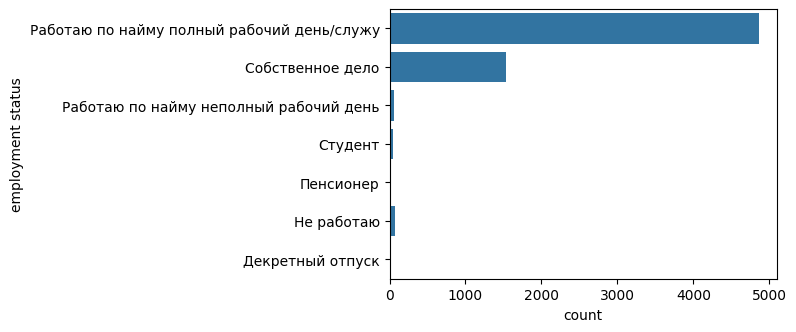

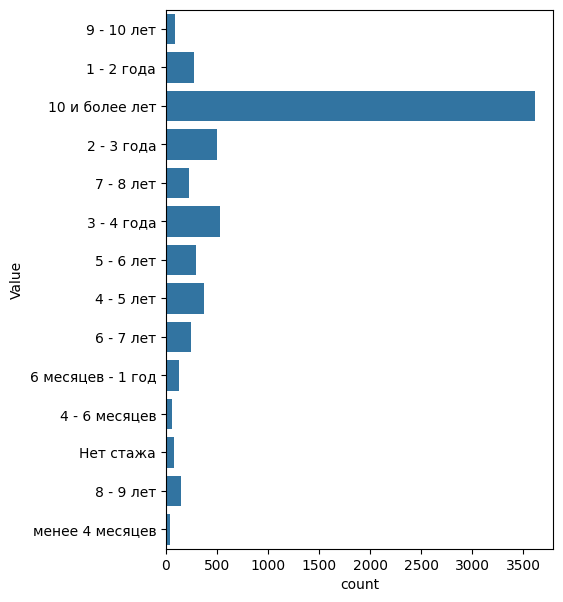

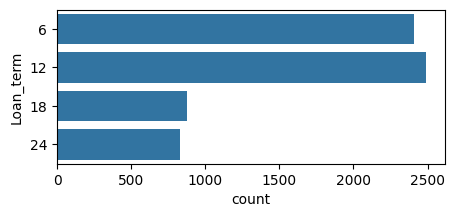

In [21]:
columns=df2[['Gender', 'SNILS', 'ChildCount', 'Goods_category', 'Family status', 'education', 'employment status', 'Value', 'Loan_term']]
for i in columns:
  h=df2[i].nunique()*0.5
  plt.figure(i, figsize=(5, h))
  myplot = sns.countplot(df2, y=i, orient='h')

В некоторых категориях признаков очень мало объектов. Категории следует укрупнить.

In [22]:
# Уникальных значений "Код магазина"
df2['Merch_code'].value_counts()

Merch_code
35    110
11    110
74    108
62    108
63    106
     ... 
19     84
36     83
6      82
72     79
66     79
Name: count, Length: 70, dtype: int64

#### Анализ числовых признаков

In [23]:
features = ["MonthProfit","MonthExpense" , "Loan_amount", "Merch_code"]

Гистограммы числовых признаков


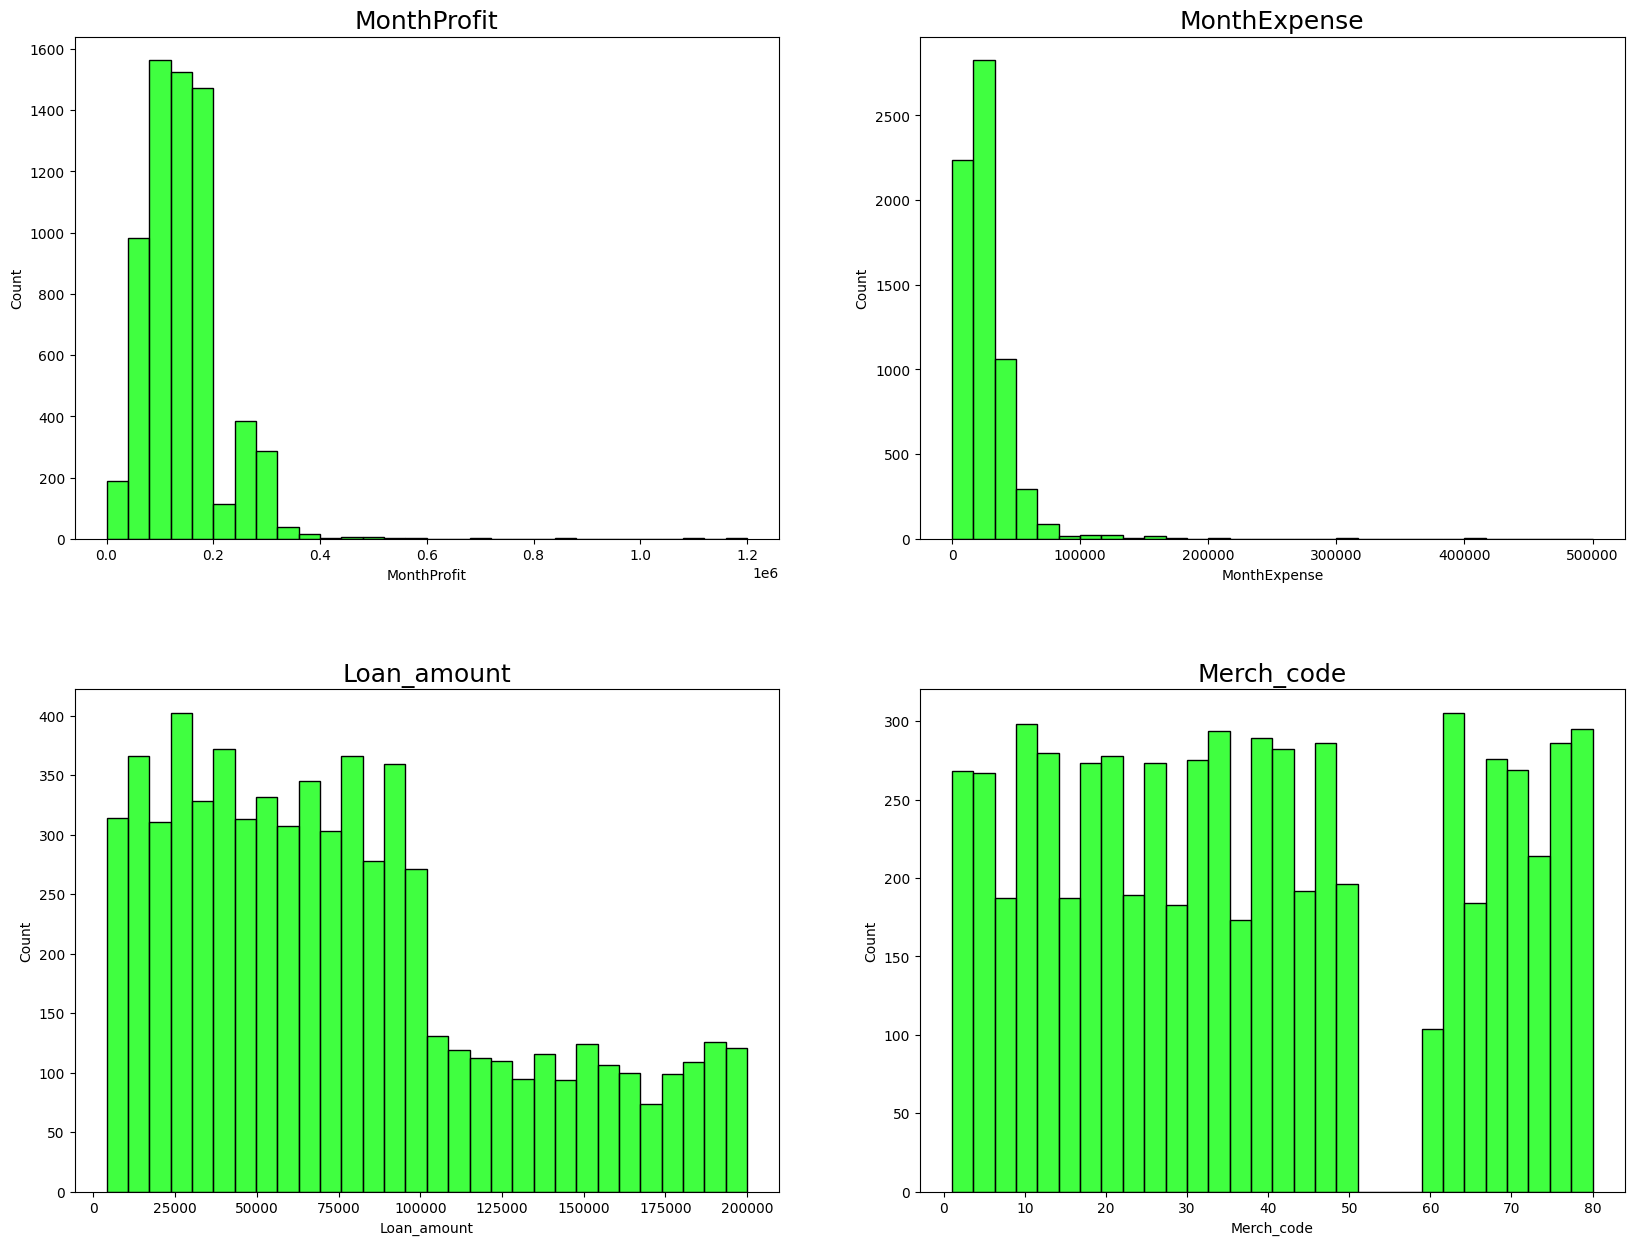

In [24]:
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограммы числовых признаков")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.histplot(data=df2, x=feature, bins=30, color='lime', ax=axes[x,y]).set_title(feature, fontsize=18)

Диаграммы размаха числовых признаков


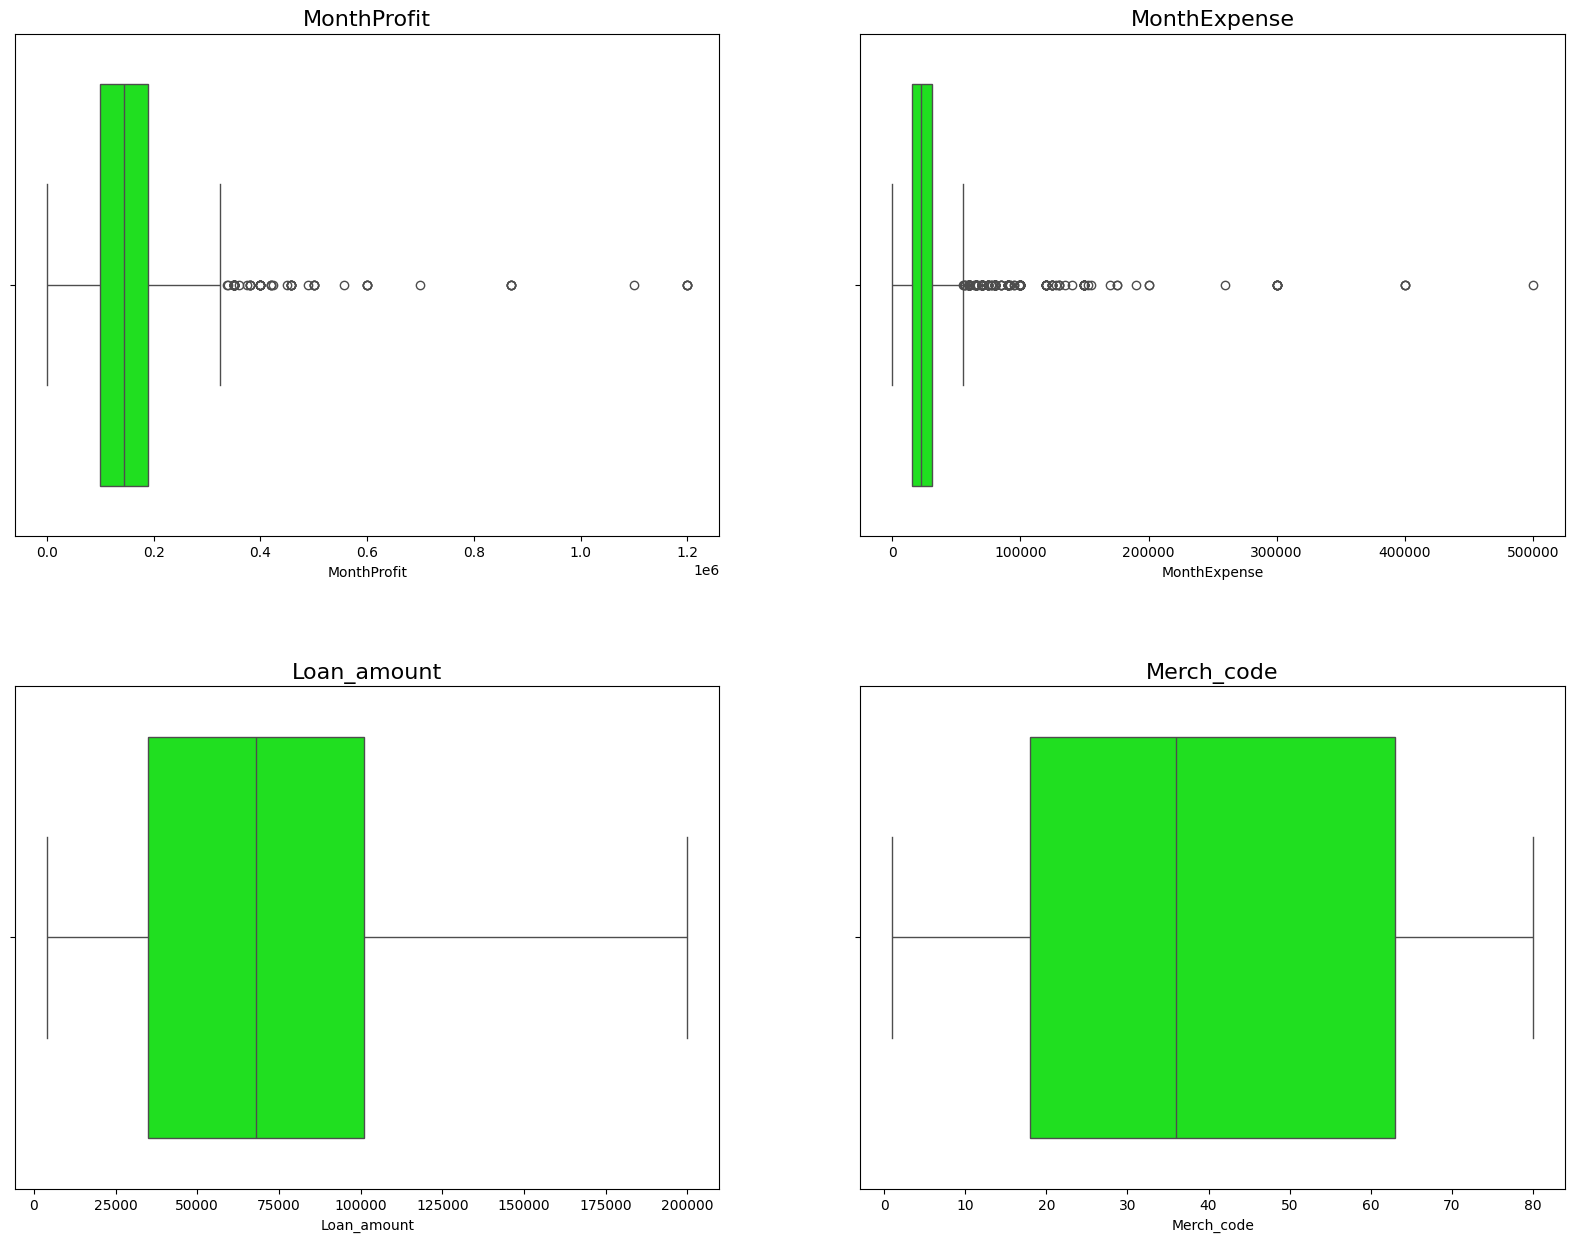

In [25]:
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)

print("Диаграммы размаха числовых признаков")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.boxplot(data=df2, x=feature, orient='h', color='lime', ax=axes[x,y]).set_title(feature, fontsize=16)

Вывод: признаки "Ежемесячный доход" и "Ежемесячный расход", имеют выбросы, которые надо удалить.
Также выявлены следующие аномалии в значениях:
1. Размер расхода в некоторых анкетах меньше прожиточного минимума. Расход должен быть пересчитан по количеству потенциальных иждивенцев и среднему прожиточному мимнимуму в России.
2. Общий трудовой стаж меньше, чем трудовой стаж на последнем месте.
3. Общий трудовой стаж больше, чем максимальный официально разрешенный в России (трудовая деятельность разрешена с 16 лет).
4. Трудовой стаж на последнем месте больше, чем максимальный официально разрешенный в России (трудовая деятельность разрешена с 16 лет).

In [26]:
for feature in features:
    sum_outliers = len(fix_errors.search_outliers(df2[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df2[feature].shape[0]} наблюдений ({sum_outliers/df2[feature].shape[0]*100:.2f}%)")


Признак MonthProfit содержит 47 выбросов из 6603 наблюдений (0.71%)
Признак MonthExpense содержит 133 выбросов из 6603 наблюдений (2.01%)
Признак Loan_amount содержит 0 выбросов из 6603 наблюдений (0.00%)
Признак Merch_code содержит 0 выбросов из 6603 наблюдений (0.00%)


#### Анализ целевых параметров

Диаграммы решений банков


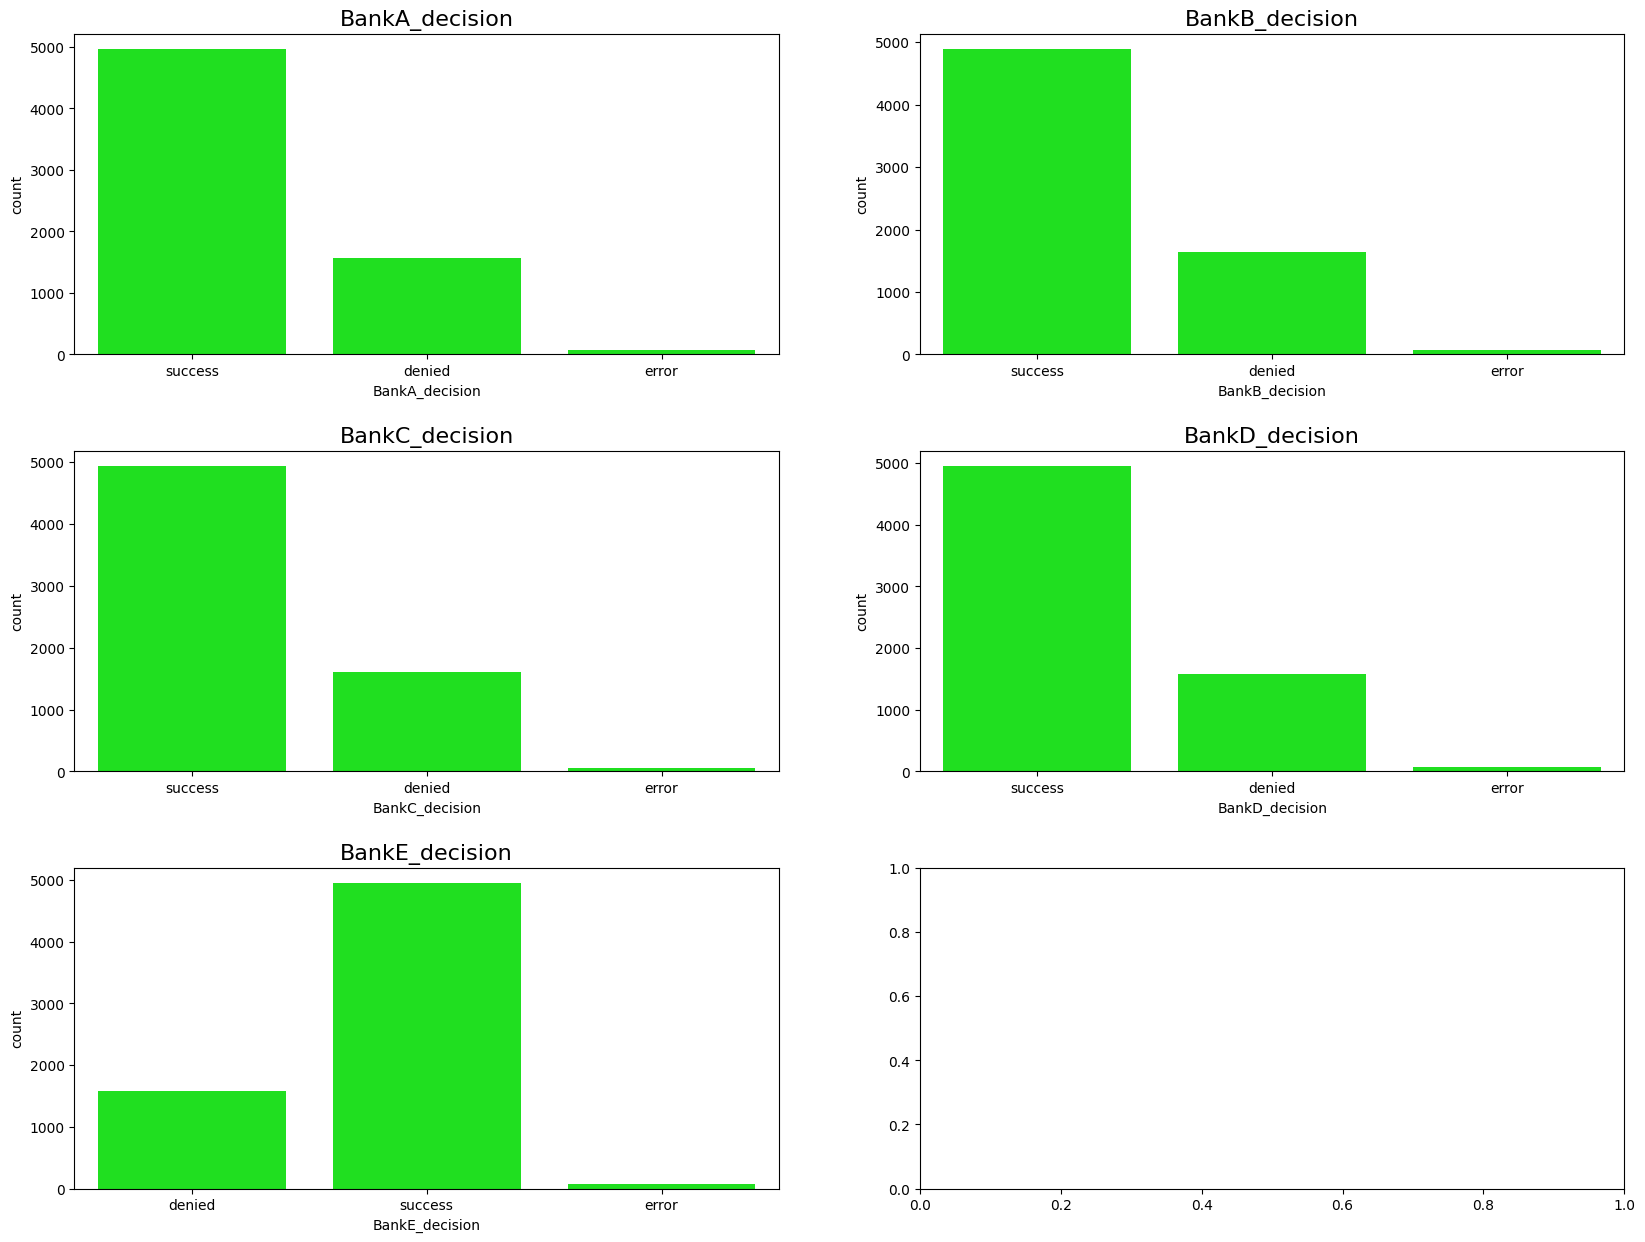

In [27]:
num=-1
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
features = [col for col in df2.columns if 'Bank' in col]

print("Диаграммы решений банков")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.countplot(data=df2, x=feature, orient='h', color='lime', ax=axes[x,y]).set_title(feature, fontsize=16)

Соотношение положительных и отрицательных решений для всех банков одинаковое.
Значение "error" для решения поставленной задачи не требуется, его также следует удалить.
Вывод: для всех банков данные несбалансированы, класс 0 (отказ) имеет меньше данных в 0,75 раза, чем класс 2 (одобрение)

In [28]:
NAd=df2[df2["BankA_decision"] == "denied"].shape[0]
NAe=df2[df2["BankA_decision"] == "error"].shape[0]
NAs=df2[df2["BankA_decision"] == "success"].shape[0]
print( "решение банка A: ", NAs, NAd, NAe, round(NAs/NAd,2),  round(NAs/len(df2),2))
NBd=df2[df2["BankB_decision"] == "denied"].shape[0]
NBe=df2[df2["BankB_decision"] == "error"].shape[0]
NBs=df2[df2["BankB_decision"] == "success"].shape[0]
print("решение банка B: ", NBs, NBd, NBe,  round(NBs/NBd,2),  round(NBs/len(df2),2))
NCd=df2[df2["BankC_decision"] == "denied"].shape[0]
NCe=df2[df2["BankC_decision"] == "error"].shape[0]
NCs=df2[df2["BankC_decision"] == "success"].shape[0]
print( "решение банка C: ", NCs, NCd, NCe,  round(NCs/NCd,2),  round(NCs/len(df2),2))
NDd=df2[df2["BankD_decision"] == "denied"].shape[0]
NDe=df2[df2["BankD_decision"] == "error"].shape[0]
NDs=df2[df2["BankD_decision"] == "success"].shape[0]
print("решение банка D: ", NDs, NDd, NDe,  round(NDs/NDd,2),   round(NDs/len(df2),2))
NEd=df2[df2["BankE_decision"] == "denied"].shape[0]
NEe=df2[df2["BankE_decision"] == "error"].shape[0]
NEs=df2[df2["BankE_decision"] == "success"].shape[0]
print("решение банка E: ", NEs, NEd, NEe,  round(NEs/NEd,2),  round(NEs/len(df2),2))
pS=round((NEs+NDs+NAs+NBs+NCs)/5/len(df2),2)
print("Средняя вероятность положительного решения по всем банкам", pS)

решение банка A:  4970 1562 71 3.18 0.75
решение банка B:  4894 1634 75 3.0 0.74
решение банка C:  4932 1609 62 3.07 0.75
решение банка D:  4953 1573 77 3.15 0.75
решение банка E:  4950 1581 72 3.13 0.75
Средняя вероятность положительного решения по всем банкам 0.75


Вывод: распределение решений для всех банков одинаковое. Следовательно, для их генерации использовался один и тот же алгоритм с разным зерном.

### Загрузка данных после исправления ошибок и аномалий

In [29]:
f_input3="data/stage_fix_errors/dataset.csv"
filename = os.path.join(project_path,f_input3)
df3 = pd.read_csv(filename, sep=';', parse_dates=['JobStartDate', 'BirthDate'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6433 non-null   datetime64[ns]
 1   education          6433 non-null   object        
 2   employment status  6433 non-null   object        
 3   Value              6433 non-null   object        
 4   JobStartDate       6342 non-null   datetime64[ns]
 5   MonthProfit        6433 non-null   int64         
 6   MonthExpense       6433 non-null   int64         
 7   Gender             6433 non-null   int64         
 8   Family status      6433 non-null   object        
 9   ChildCount         6433 non-null   int64         
 10  SNILS              6433 non-null   int64         
 11  BankA_decision     6433 non-null   object        
 12  BankB_decision     6433 non-null   object        
 13  BankC_decision     6433 non-null   object        
 14  BankD_de

In [31]:
features = ["MonthProfit","MonthExpense" ]
for feature in features:
    sum_outliers = len(fix_errors.search_outliers(df3[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df3[feature].shape[0]} наблюдений ({sum_outliers/df3[feature].shape[0]*100:.2f}%)")

Признак MonthProfit содержит 0 выбросов из 6433 наблюдений (0.00%)
Признак MonthExpense содержит 8 выбросов из 6433 наблюдений (0.12%)


Диаграммы размаха числовых признаков


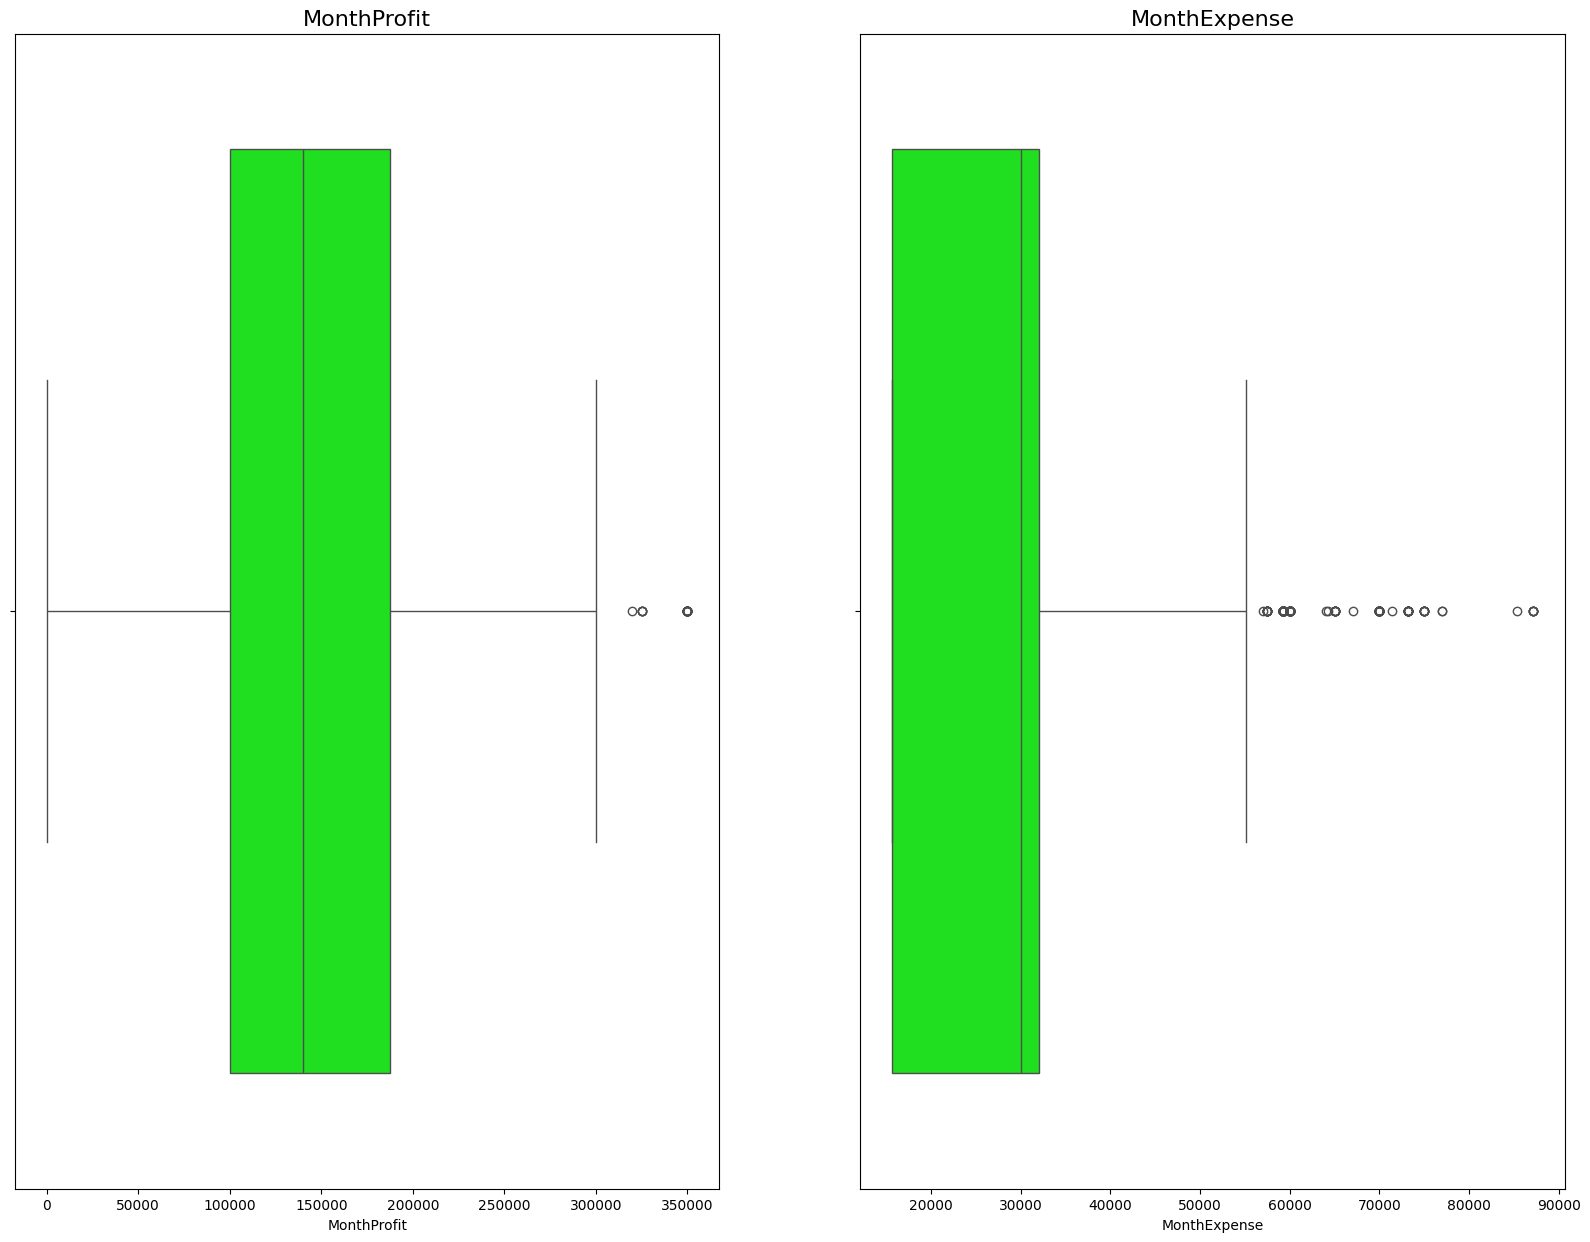

In [32]:
num=-1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)

print("Диаграммы размаха числовых признаков")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.boxplot(data=df3, x=feature, orient='h', color='lime', ax=axes[y]).set_title(feature, fontsize=16)

## 2.4. Создание признаков

### Анализ категориальных данных

Признаки **"Образование", "Тип занятости", "Стаж работы", "Семейное положение", "Срок кредита", "Категория товара", "Код магазина"**  содержат ограниченный набор значений и могут быть преобразованы в категориальные. Однако из-за малой представленности некоторых категорий, количество категорий может быть сокращено.
Признаки **"Кол-во детей младше 18 лет" и "Срок кредита"** являются числовыми дискретными, однако также могут быть преобразованы в категориальные.
Для решения обеих задач выясним как меняются решения банков в зависимости от той или иной категории.

Соотношение положительных и отрицательных решений банка А для разных категорий


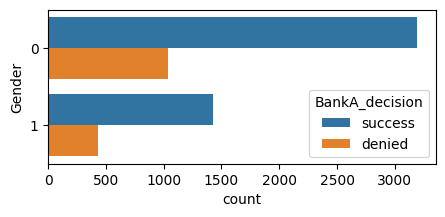

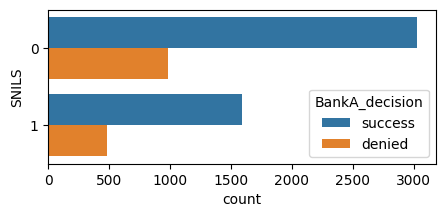

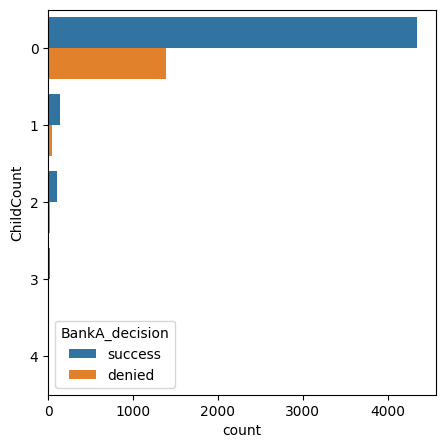

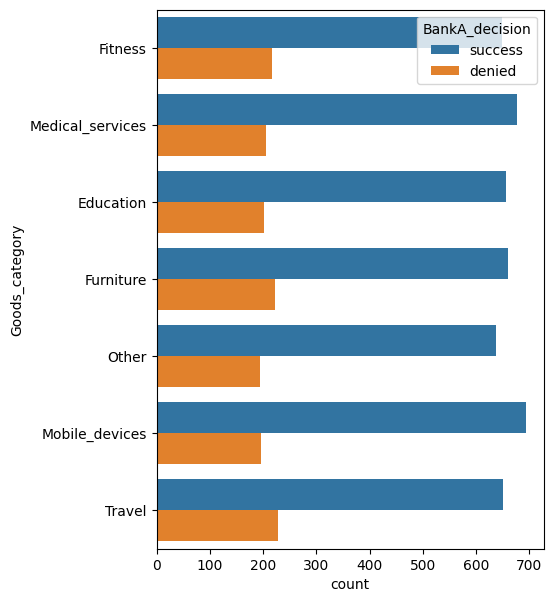

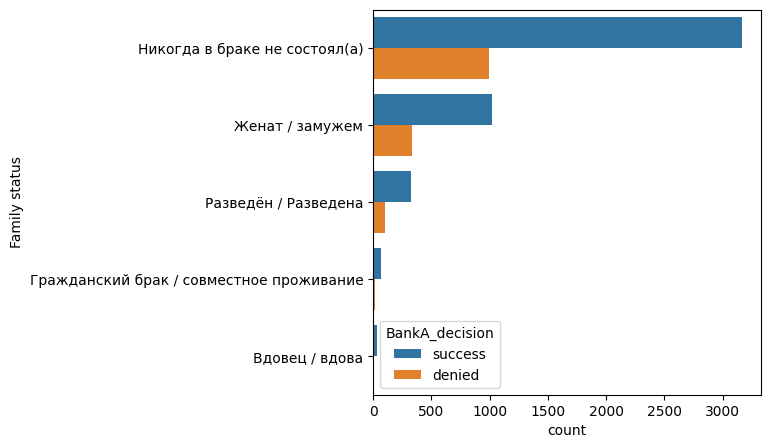

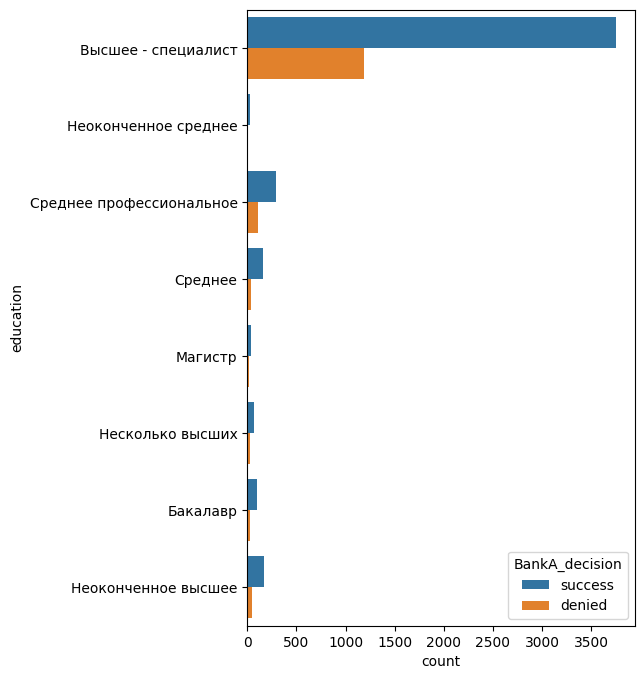

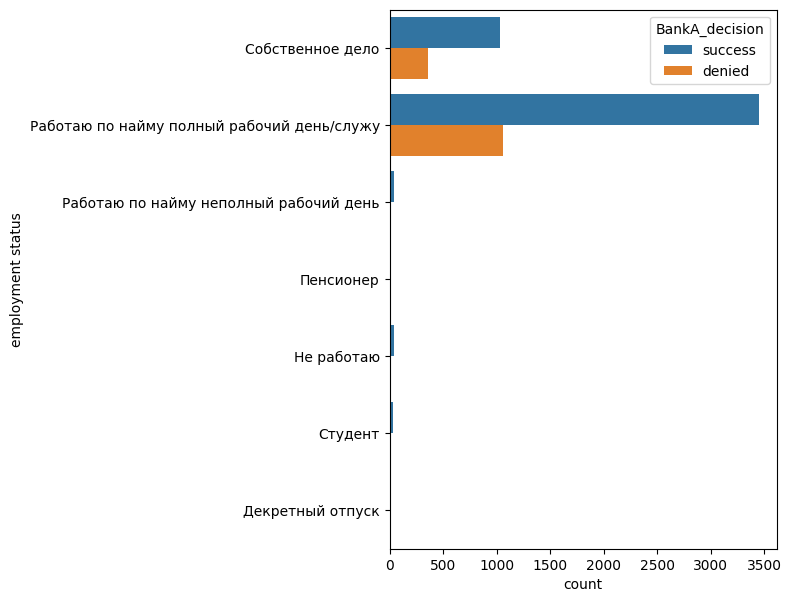

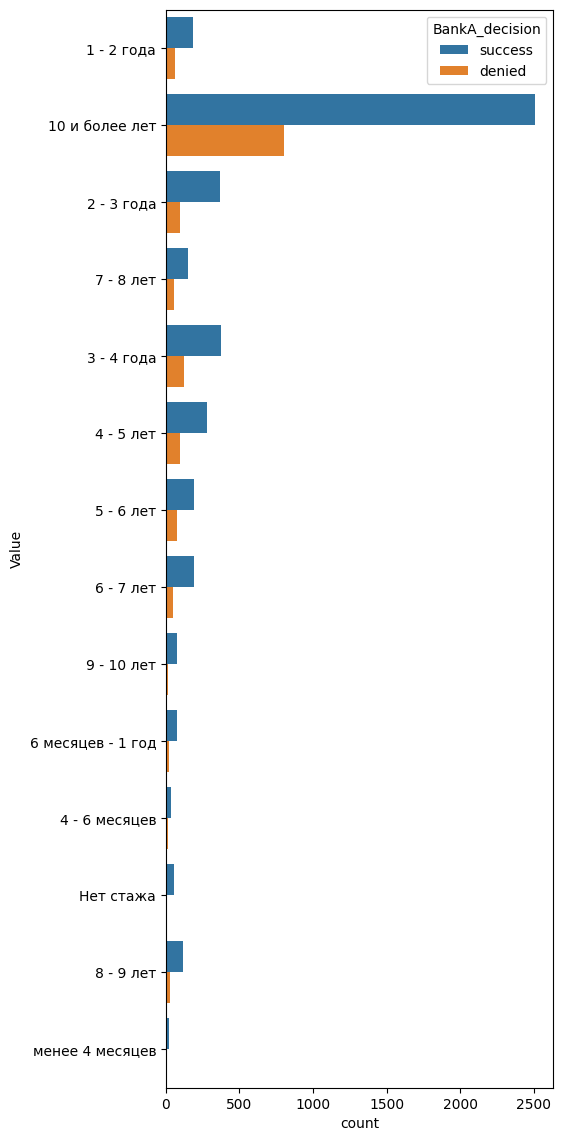

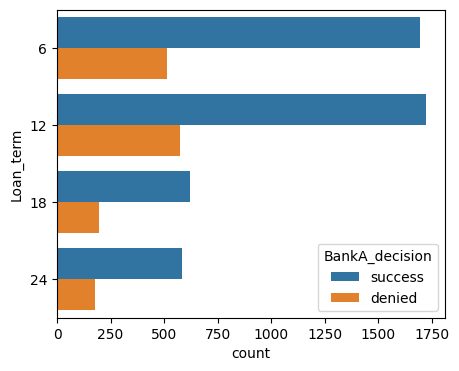

In [33]:
E="error"
df3_all=df3[(df3[ 'BankA_decision'] != E) & (df3[ 'BankB_decision'] != E) &  (df3[ 'BankC_decision'] != E) & (df3[ 'BankD_decision'] != E) & (df3[ 'BankE_decision'] != E)]
columns= ['Gender', 'SNILS', 'ChildCount', 'Goods_category', 'Family status', 'education', 'employment status', 'Value', 'Loan_term']

print('Соотношение положительных и отрицательных решений банка А для разных категорий')
for i in columns:
  h=df3_all[i].nunique()*1
  plt.figure(i, figsize=(5, h))
  sns.countplot(data = df3_all, y=i , hue = 'BankA_decision', orient='h')

Проанализируем каждый из признаков для банка А.
Ниже обозначено:
N - всего представителей этой категории
pcat - процентное число представителей этой категории по отношению ко всей выборке
ps - процентное число одобрений банка по отношению к общему количеству представителей категории

**Таблицы сопряженности для разных категорий**

In [34]:
E="error"
df3_a=df3[(df3[ 'BankC_decision'] != E)]

columns= ['Gender', 'SNILS', 'ChildCount', 'Goods_category', 'Family status', 'education', 'employment status', 'Value', 'Loan_term', 'Merch_code']
print('Таблицы сопряженности для разных категорий')
for column in columns:
    pclass = pd.crosstab(index = df3_a[column], columns = df3_a[ 'BankC_decision'])
    pclass['N']=pclass['success']+pclass['denied']
    pclass['pcat']=pclass['N']/df3_a.shape[0]*100
    pclass['ps']=pclass['success']/pclass['N']*100
    display(pclass.sort_values('pcat'))

Таблицы сопряженности для разных категорий


BankC_decision,denied,success,N,pcat,ps
Gender,,,,,
1,487,1447,1934,30.351538,74.819028
0,1082,3356,4438,69.648462,75.619648


BankC_decision,denied,success,N,pcat,ps
SNILS,,,,,
1,536,1648,2184,34.274953,75.457875
0,1033,3155,4188,65.725047,75.334288


BankC_decision,denied,success,N,pcat,ps
ChildCount,,,,,
5,0,1,1,0.015694,100.000000
4,2,4,6,0.094162,66.666667
3,9,21,30,0.470810,70.000000
2,37,101,138,2.165725,73.188406
1,42,151,193,3.028876,78.238342
0,1479,4525,6004,94.224733,75.366422


BankC_decision,denied,success,N,pcat,ps
Goods_category,,,,,
Other,224,647,871,13.669178,74.282434
Education,205,694,899,14.108600,77.196885
Fitness,202,701,903,14.171375,77.630122
Medical_services,233,678,911,14.296924,74.423710
Travel,235,686,921,14.453861,74.484256
Mobile_devices,234,697,931,14.610797,74.865736
Furniture,236,700,936,14.689266,74.786325


BankC_decision,denied,success,N,pcat,ps
Family status,,,,,
Вдовец / вдова,9,40,49,0.768989,81.632653
Гражданский брак / совместное проживание,28,64,92,1.443817,69.565217
Разведён / Разведена,112,339,451,7.077841,75.166297
Женат / замужем,346,1089,1435,22.520402,75.888502
Никогда в браке не состоял(а),1074,3271,4345,68.188952,75.281933


BankC_decision,denied,success,N,pcat,ps
education,,,,,
Неоконченное среднее,9,20,29,0.455116,68.965517
Магистр,10,53,63,0.988701,84.126984
Несколько высших,30,74,104,1.632141,71.153846
Бакалавр,41,101,142,2.228500,71.126761
Среднее,48,158,206,3.232894,76.699029
Неоконченное высшее,53,169,222,3.483992,76.126126
Среднее профессиональное,107,329,436,6.842436,75.458716
Высшее - специалист,1271,3899,5170,81.136221,75.415861


BankC_decision,denied,success,N,pcat,ps
employment status,,,,,
Пенсионер,2,16,18,0.282486,88.888889
Декретный отпуск,4,15,19,0.298180,78.947368
Студент,7,27,34,0.533584,79.411765
Работаю по найму неполный рабочий день,12,48,60,0.941620,80.000000
Не работаю,20,45,65,1.020088,69.230769
Собственное дело,367,1095,1462,22.944131,74.897401
Работаю по найму полный рабочий день/служу,1157,3557,4714,73.979912,75.456088


BankC_decision,denied,success,N,pcat,ps
Value,,,,,
менее 4 месяцев,8,23,31,0.486503,74.193548
4 - 6 месяцев,11,38,49,0.768989,77.551020
Нет стажа,20,47,67,1.051475,70.149254
9 - 10 лет,21,74,95,1.490898,77.894737
6 месяцев - 1 год,23,78,101,1.585060,77.227723
8 - 9 лет,40,116,156,2.448211,74.358974
7 - 8 лет,44,172,216,3.389831,79.629630
6 - 7 лет,63,191,254,3.986190,75.196850
1 - 2 года,61,195,256,4.017577,76.171875


BankC_decision,denied,success,N,pcat,ps
Loan_term,,,,,
24,192,606,798,12.523540,75.939850
18,223,623,846,13.276836,73.640662
6,559,1757,2316,36.346516,75.863558
12,595,1817,2412,37.853107,75.331675


BankC_decision,denied,success,N,pcat,ps
Merch_code,,,,,
72,23,51,74,1.161331,68.918919
66,21,54,75,1.177024,72.000000
19,21,58,79,1.239799,73.417722
6,18,62,80,1.255493,77.500000
2,25,57,82,1.286880,69.512195
...,...,...,...,...,...
35,24,79,103,1.616447,76.699029
63,25,79,104,1.632141,75.961538
74,29,76,105,1.647834,72.380952


Общие выводы: при недостаточной представленности категории вследствие усиления влияния небольших отклонений меняется соотношение положительных и отрицательных решений, что может исказить реальную статистическую картину. Поэтому предлагается объединять малые категории в более крупные с учетом их логического смысла и возможного влияния на результат.

Анализ признака **Кол-во детей младше 18 лет (ChildCount)**
Категории признака представлены неравномерно, основное количество анкет попадает в категорию без детей. Также есть небольшая группа с 1 ребенком. Остальные группы очень слабо представлены. Поэтому вместо этого предлагается создать новый категориальный признак с тремя значениями:
- Без детей
- 1 ребенок
- 2 и более детей

Категория будет переименована в '**Колво_детей**'.

Анализ признака **Категория товара (Goods_category)**
Все категории представлены равномерно, поэтому будет создан категориальный признак с исходными 7 значениями:
- Fitness
- Medical_services
- Education
- Furniture
- Other
- Mobile_devices
- Travel

Признак будет переименован в '**Категория_товара**'.

Анализ признака **Семейное положение (Family status)**
Для этого признака плохо представлены категории  'Гражданский брак / совместное проживание' и  'Вдовец / вдова', поэтому будем их объединять логически с другими категориями, в результате получим 3 категории:

- Никогда в браке не состоял(а)
- Женат / замужем (+ Гражданский брак / совместное проживание)
- Разведён / Разведена (+Вдовец / вдова)

Признак будет переименован в '**Семейное_положение**'.

Анализ признака **Образование (education)**
Здесь хорошо представлена только 1 категория - 'Высшее - специалист', следом идет категория  'Среднее профессиональное'. Поэтому укрупнение будет по следующим категориям:

- Высшее ('Высшее - специалист' +  'Бакалавр' +  'Магистр' + 'Несколько высших')
- Среднее профессиональное ( 'Среднее профессиональное')
- Среднее ('Неоконченное среднее' + 'Среднее' +  'Неоконченное высшее')

Признак будет переименован в '**Образование**'.

Анализ признака **Тип занятости (employment status)**
Здесь хорошо представлены 2 категории:  'Работаю по найму полный рабочий день/служу' и 'Собственное дело'.
Поэтому будут сформированы новые категории:

- Собственное дело ('Собственное дело')
- Работаю по найму ('Работаю по найму полный рабочий день/служу' +  'Работаю по найму неполный рабочий день')
- Иные виды ( 'Пенсионер' + 'Студент' +  'Декретный отпуск' + 'Не работаю')

Признак будет переименован в '**Тип_занятости**'.

Также будет создан еще один бинарный признак: 'Имеет доход', который для категории  'Не работаю' будет равен 0, а для остальных - 1. Признак должен отразить факт наличия постоянного дохода у клиента.

Анализ признака **Стаж работы (Value)**
Признак имеет 20 значений, из которых хорошо представлена категория '10 и более лет', приемлимо:  '2 - 3 года',  '3 - 4 года',  '4 - 5 лет'. Поэтому будет выполняться укрупнение следующим образом:
- Нет стажа ('Нет стажа')
- Менее  6 месяцев ( 'менее 4 месяцев' +  '4 - 6 месяцев')
- Менее 2 лет ('6 месяцев - 1 год' + '1 - 2 года')
- Менее 5 лет ( '2 - 3 года' +  '3 - 4 года' +  '4 - 5 лет')
- Менее 10 лет ('5 - 6 лет' + '6 - 7 лет' + '7 - 8 лет' + '8 - 9 лет' +'9 - 10 лет')
- 10 и более лет ( '10 и более лет')

Признак будет переименован в **'Стаж_работы'**.
Также будет создан дополнительный категориальный признак **'Последний_стаж_работы'**, который будет вычисляться на основе признака 'Дата начала работы' (JobStartDate) и иметь эти же значения категорий. Сам признак 'JobStartDate' подлежит удалению.

Анализ признака **Срок кредита (Loan_term)**
Имеет 4 возможных значения, каждая категория представлена достаточно хорошо. Однако имеется явный перевес в сторону краткосрочных кредитов. Категории останутся без изменений:
- 6
- 12
- 18
- 24

Признак будет переименован в 'Срок кредита'.

Анализ признака **Пол (Gender)**
Признак является бинарным, и хотя количество представителей двух категорий отличается в 2 раза,  никаких дополнительных действий с признаком выполняться не будет.

Признак будет переименован в 'Пол'.

Анализ признака **СНИЛС (SNILS)**
Признак является бинарным, и хотя количество представителей двух категорий отличается в 2 раза,  никаких дополнительных действий с признаком выполняться не будет.

Признак будет переименован в 'СНИЛС'.

Анализ признака **Код магазина (Merch_code)**
Имеет 70 уникальных значений с почти одинаковым количеством представителей и почти одинаковой вероятностью положительного решения. Все категории остаются как есть.
Признак будет переименован в 'Код магазина'.

Для всех категориальных признаков будет выполнено преобразование One-Hot Encoding

In [35]:
list(df3['ChildCount'].unique())

[0, 2, 1, 3, 4, 5]

### Анализ числовых данных
К числовым признакам относятся:
- Сумма заказа (Loan_amount)
- Ежемесячный доход (MonthProfit)
- Ежемесячный расход (MonthExpense)
- Дата рождения (BirthDate)

На их основы будут получены следующие признаки:
Кредитная нагрузка - отношения дохода семьи к ежемесячному платежу по кредиту, вещественное число, безразмерная величина
Кредит возможен - бинарный признак, равен 1, если Кредитная нагрузка больше 1,25, т.е. если платеж по кредиту не превышает 80% того, что остается в семье после всех расходов.
Возраст, целое число.





###  Данные после 4-го этапа: создание признаков

# Предварительный анализ данных

In [36]:
f_input4="data/stage_create_features/dataset.csv"
filename4 = os.path.join(project_path,f_input4)
df4 = pd.read_csv(filename4, sep=';')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Columns: 155 entries, Ежемесячный_доход to Решение_банка_E
dtypes: float64(1), int64(147), object(7)
memory usage: 7.6+ MB


## Анализ категориальных данных

In [37]:
E="error"
df4_a=df4[(df4[ 'Решение_банка_A'] != 2)]

columns= ['Колво_детей', 'Категория_товара', 'Семейное_положение', 'Образование', 'Тип_занятости', 'Стаж_работы','Последний_стаж_работы', 'Срок_кредита', 'Имеет_доход', 'Кредит_возможен', 'Возраст']
print('Таблицы сопряженности для разных категорий')
for column in columns:
    pclass = pd.crosstab(index = df4_a[column], columns = df4_a[ 'Решение_банка_A'])
    pclass['N']=pclass[1]+pclass[0]
    pclass['pcat']=pclass['N']/df4_a.shape[0]*100
    pclass['ps']=pclass[1]/pclass['N']*100
    display(pclass.sort_values('pcat'))

Таблицы сопряженности для разных категорий


Решение_банка_A,0,1,N,pcat,ps
Колво_детей,,,,,
2 и более детей,34,138,172,2.703552,80.232558
1 ребенок,44,148,192,3.017919,77.083333
Без детей,1450,4548,5998,94.278529,75.825275


Решение_банка_A,0,1,N,pcat,ps
Категория_товара,,,,,
Other,203,671,874,13.737818,76.773455
Fitness,225,673,898,14.115058,74.944321
Education,211,689,900,14.146495,76.555556
Medical_services,210,700,910,14.303678,76.923077
Travel,240,681,921,14.476580,73.941368
Mobile_devices,203,721,924,14.523735,78.030303
Furniture,236,699,935,14.696636,74.759358


Решение_банка_A,0,1,N,pcat,ps
Семейное_положение,,,,,
Разведён / Разведена,117,384,501,7.874882,76.646707
Женат / замужем,368,1145,1513,23.781830,75.677462
Никогда в браке не состоял(а),1043,3305,4348,68.343288,76.011960


Решение_банка_A,0,1,N,pcat,ps
Образование,,,,,
Среднее профессиональное,122,312,434,6.821754,71.889401
Среднее,87,369,456,7.167557,80.921053
Высшее,1319,4153,5472,86.010688,75.895468


Решение_банка_A,0,1,N,pcat,ps
Тип_занятости,,,,,
Иные виды,32,104,136,2.137693,76.470588
Собственное дело,374,1083,1457,22.901603,74.330817
Работаю по найму,1122,3647,4769,74.960704,76.473055


Решение_банка_A,0,1,N,pcat,ps
Стаж_работы,,,,,
Нет стажа,11,56,67,1.053128,83.582090
Менее 2 лет,92,263,355,5.580006,74.084507
Менее 10 лет,240,751,991,15.576863,75.782038
Менее 5 лет,322,1070,1392,21.879912,76.867816
10 и более лет,841,2636,3477,54.652625,75.812482


Решение_банка_A,0,1,N,pcat,ps
Последний_стаж_работы,,,,,
Менее 2 лет,274,835,1109,17.431625,75.293057
Менее 10 лет,291,898,1189,18.689091,75.525652
10 и более лет,455,1490,1945,30.572147,76.606684
Менее 5 лет,467,1489,1956,30.745049,76.124744


Решение_банка_A,0,1,N,pcat,ps
Срок_кредита,,,,,
24,186,613,799,12.558944,76.720901
18,202,649,851,13.376297,76.263220
6,539,1769,2308,36.277900,76.646447
12,601,1803,2404,37.786859,75.000000


Решение_банка_A,0,1,N,pcat,ps
Имеет_доход,,,,,
0,21,77,98,1.540396,78.571429
1,1507,4757,6264,98.459604,75.941890


Решение_банка_A,0,1,N,pcat,ps
Кредит_возможен,,,,,
0,26,117,143,2.247721,81.818182
1,1502,4717,6219,97.752279,75.848207


Решение_банка_A,0,1,N,pcat,ps
Возраст,,,,,
83,0,1,1,0.015718,100.000000
69,0,2,2,0.031437,100.000000
80,1,1,2,0.031437,50.000000
77,2,3,5,0.078592,60.000000
76,0,5,5,0.078592,100.000000
...,...,...,...,...,...
22,58,186,244,3.835272,76.229508
21,63,188,251,3.945300,74.900398
34,62,203,265,4.165357,76.603774


<Axes: xlabel='Кредитная_нагрузка', ylabel='Count'>

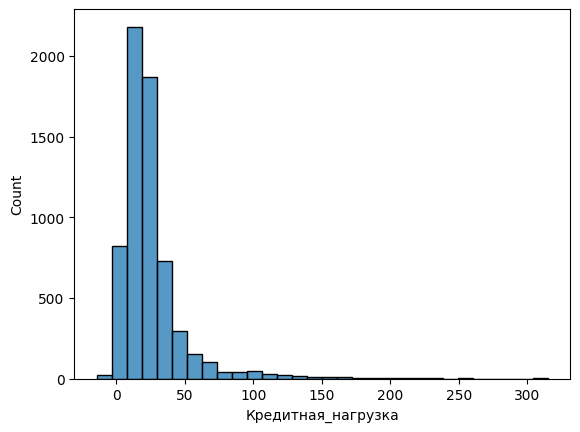

In [38]:
sns.histplot(data=df4, x="Кредитная_нагрузка", bins=30)

<Axes: xlabel='Кредитная_нагрузка', ylabel='Count'>

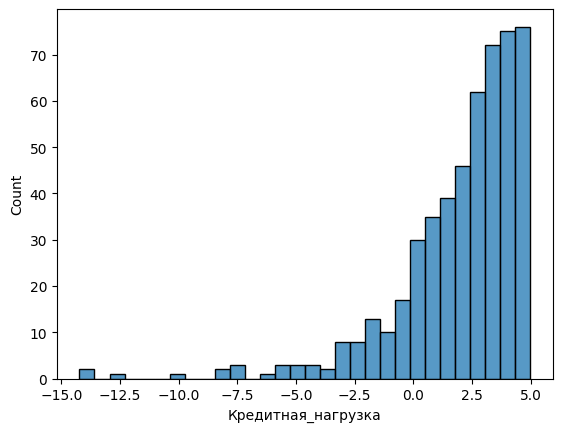

In [39]:
sns.histplot(data=df4[df4["Кредитная_нагрузка"]<5], x="Кредитная_нагрузка", bins=30)

<Axes: xlabel='Ежемесячный_доход', ylabel='Count'>

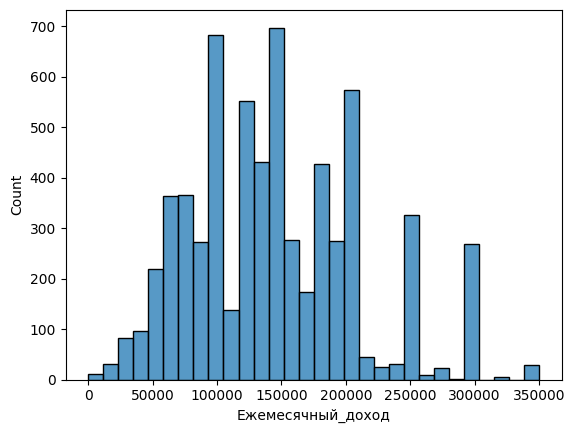

In [40]:
sns.histplot(data=df4, x="Ежемесячный_доход", bins=30)

In [41]:
df4_1=df4[(df4[ 'Решение_банка_A'] != 2) & (df4[ 'Решение_банка_B'] != 2) &  (df4[ 'Решение_банка_C'] != 2) & (df4[ 'Решение_банка_D'] != 2) & (df4[ 'Решение_банка_E'] != 2)]

In [42]:
t=[ 'Решение_банка_A',  'Решение_банка_B',  'Решение_банка_C',  'Решение_банка_D',  'Решение_банка_E']

In [43]:
df4_2=df4_1[['Код_Образование', 'Код_Тип_занятости', 'Пол', 'СНИЛС', 'Код_Колво_детей',  'Имеет_доход','Кредит_возможен','Ежемесячный_доход','Ежемесячный_расход', 'Сумма_заказа','Кредитная_нагрузка', 'Решение_банка_A']]
df4_3=df4_1[['Пол', 'СНИЛС', 'Код_Колво_детей', 'Код_Категория_товара', 'Код_Семейное_положение', 'Код_Образование', 'Код_Тип_занятости', 'Код_Стаж_работы', 'Срок_кредита', 'Имеет_доход','Кредит_возможен','Ежемесячный_доход','Ежемесячный_расход', 'Сумма_заказа','Кредитная_нагрузка','Возраст','Код_Последний_стаж_работы', 'Код_магазина']+t]

In [44]:
# df4[columns+['решение банка A']].corr()['решение банка A'].sort_values()
df_corr = df4_3.corr()[t]
df_corr.sort_values(by=t[1])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Код_Тип_занятости,-0.017377,-0.036037,-0.003764,0.007986,0.028555
Код_Категория_товара,0.003635,-0.015867,0.011939,0.013998,-0.001613
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Сумма_заказа,0.003003,-0.010235,-0.002519,0.009504,-0.009967
Срок_кредита,-0.002784,-0.007939,-0.010078,0.006875,-0.009650
Ежемесячный_доход,-0.006491,-0.007917,-0.006727,0.009957,0.005549
Код_Образование,-0.018971,-0.007073,-0.000368,-0.001079,0.004973
Код_Семейное_положение,-0.002063,-0.002004,0.004002,0.027828,-0.015871
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Возраст,0.001136,0.007231,0.007673,-0.002499,-0.019776


In [167]:
df_corr[(abs(df_corr.Решение_банка_A)<0.01)].sort_values(by=t[1])


,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Код_Категория_товара,-0.002035,-0.016063,-0.019589,0.002782,0.013560
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Сумма_заказа,0.003003,-0.010235,-0.002519,0.009504,-0.009967
Срок_кредита,-0.002784,-0.007939,-0.010078,0.006875,-0.009650
Ежемесячный_доход,-0.006491,-0.007917,-0.006727,0.009957,0.005549
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Код_Семейное_положение,0.006262,0.003568,0.003346,-0.012826,0.021236
Возраст,0.001162,0.007223,0.007635,-0.002535,-0.019780
Кредитная_нагрузка,-0.000473,0.007807,-0.004415,0.007519,0.015797
Имеет_доход,-0.009897,0.009121,0.010253,-0.025854,-0.007024


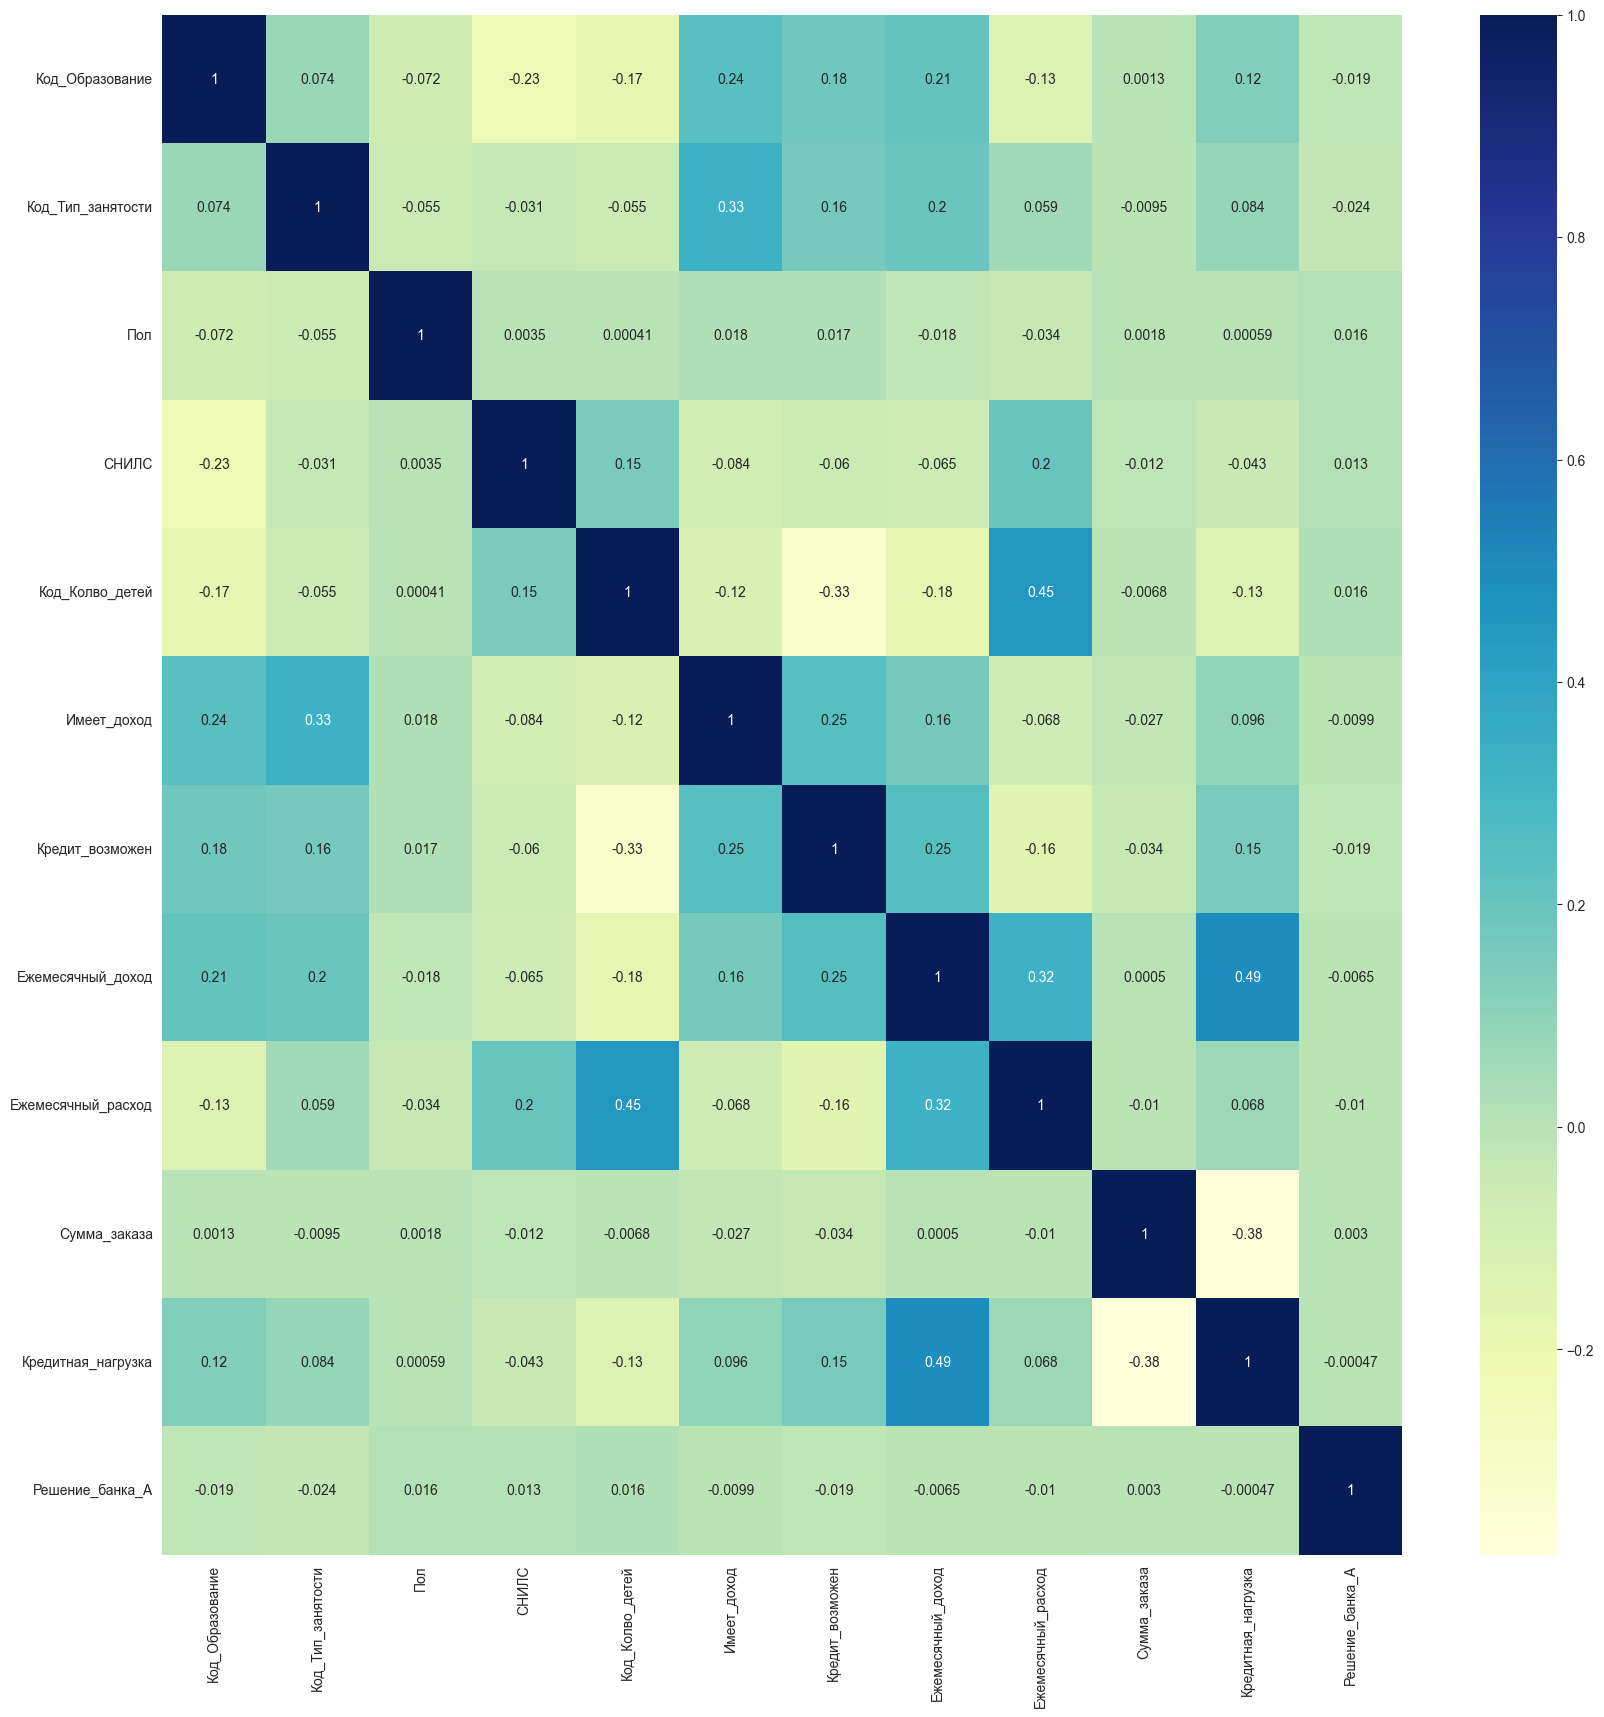

In [165]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df4_2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<Axes: xlabel='Кредитная_нагрузка', ylabel='Решение_банка_A'>

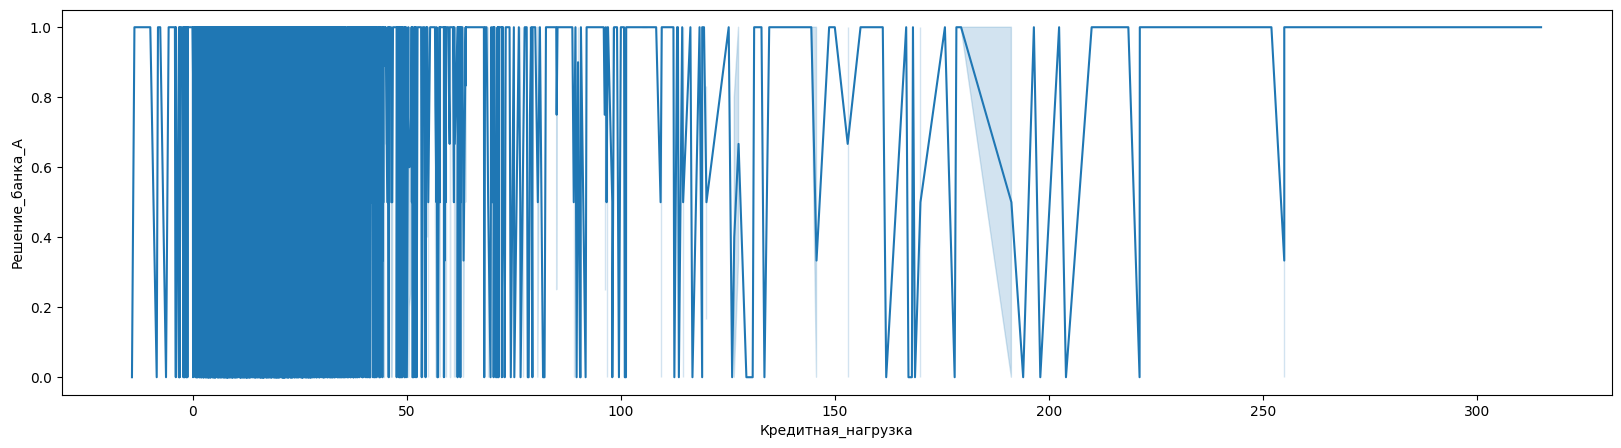

In [45]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df4_1[(df4_1["Кредитная_нагрузка"]>-1200) & (df4_1["Кредитная_нагрузка"]<1200)], x="Кредитная_нагрузка", y="Решение_банка_A")


/tmp/ipykernel_22860/947879475.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,


[Text(0, 0, '0'), Text(1, 0, '1')]

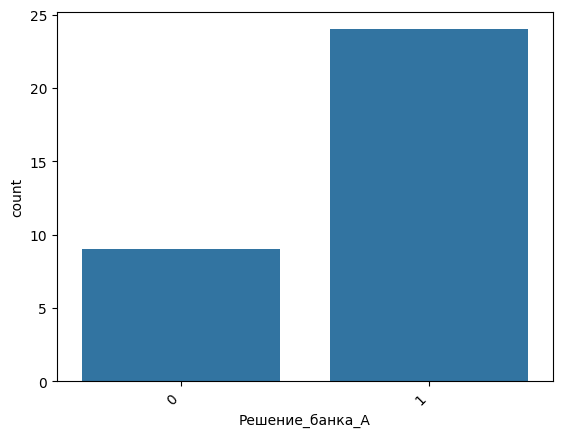

In [46]:
plt.figure()
myplot=sns.countplot(df4_1[df4_1["Кредитная_нагрузка"]<-2], x= 'Решение_банка_A')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                    horizontalalignment='right')

In [47]:
cols = [col for col in df4.columns if 'Общий_стаж' in col]
# df4_1[cols +['решение банка B']].corr()['решение банка B'].sort_values()
df4_1[cols +t].corr()[t].sort_values(by=t[0])


,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Общий_стаж_Менее 2 лет,-0.005746,-0.003305,0.001146,-0.013593,-0.005175
Общий_стаж_10 и более лет,-0.005122,0.004234,0.000034,0.000065,0.003566
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Общий_стаж_Менее 10 лет,-0.000417,0.002258,0.014212,-0.008036,-0.014202
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Общий_стаж_Менее 5 лет,0.007933,-0.000977,-0.009311,0.014506,0.004507
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Общий_стаж_Нет стажа,0.019603,-0.004517,-0.016729,0.015984,0.004644
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354


In [154]:
cols = [col for col in df4.columns if 'Образование_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Образование_Среднее профессиональное,-0.023493,0.010263,-0.002680,-0.006104,-0.007531
Образование_Высшее,-0.006763,-0.009405,0.000673,0.001341,0.006727
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Образование_Среднее,0.031849,0.002649,0.001697,0.004124,-0.001710
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354


In [155]:
cols = [col for col in df4.columns if 'Посл_стаж_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Посл_стаж_Менее 2 лет,-0.004978,0.000741,-0.001281,-0.003078,0.001141
Посл_стаж_Менее 10 лет,-0.004051,-0.013325,0.009766,-0.013956,0.000012
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Посл_стаж_Менее 5 лет,0.000224,0.001691,-0.009098,0.008156,-0.016527
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Посл_стаж_10 и более лет,0.009365,0.014656,0.003964,0.003952,0.008374
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354
Посл_стаж_Нет стажа,NaN,NaN,NaN,NaN,NaN


In [156]:
cols = [col for col in df4.columns if 'Сем_положение_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Сем_положение_Женат / замужем,-0.006304,-0.003999,-0.000854,0.024538,-0.025750
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Сем_положение_Разведён / Разведена,0.002578,0.000822,0.005360,0.013133,0.001818
Сем_положение_Никогда в браке не состоял(а),0.004281,0.003186,-0.002316,-0.030056,0.022522
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354


In [157]:
cols = [col for col in df4.columns if 'Срок_кредита_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Срок_кредита_12,-0.017981,0.001060,-0.000261,0.000162,-0.015371
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Срок_кредита_18,0.000400,0.021730,-0.017325,0.015772,-0.000940
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Срок_кредита_24,0.005713,-0.023472,0.001912,-0.004019,-0.001552
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Срок_кредита_6,0.013919,-0.000361,0.011251,-0.008600,0.017234
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354


In [158]:
cols = [col for col in df4.columns if 'Кат_товара_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Кат_товара_Travel,-0.018801,-0.006883,-0.005103,0.010390,0.026914
Кат_товара_Furniture,-0.010615,-0.000952,-0.008893,-0.008722,0.014333
Кат_товара_Fitness,-0.008601,0.012869,0.021370,0.007581,0.023123
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Кат_товара_Education,0.004971,0.000108,0.012982,0.005742,-0.026086
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Кат_товара_Other,0.006718,-0.031651,-0.009775,0.008592,-0.000199
Кат_товара_Medical_services,0.007686,0.009551,-0.005916,-0.014445,-0.017556
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197


In [159]:
cols = [col for col in df4.columns if 'код_магазина_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
код_магазина_29,-0.036529,0.012446,-0.004946,-0.003163,0.013428
код_магазина_26,-0.032886,-0.013127,0.002521,-0.005663,0.007862
код_магазина_50,-0.021958,0.006546,0.008710,0.010457,0.000856
код_магазина_31,-0.021427,-0.018382,0.006455,-0.001546,-0.011311
код_магазина_61,-0.020421,0.003989,-0.000148,-0.014022,-0.004777
...,...,...,...,...,...
код_магазина_13,0.024393,-0.007654,-0.024549,0.015059,-0.000796
код_магазина_21,0.025136,0.007630,-0.003323,-0.008169,-0.001424
код_магазина_3,0.025787,0.005120,0.000818,0.019322,0.029349
код_магазина_10,0.026959,0.000986,0.003097,-0.004818,0.020807


In [160]:
cols = [col for col in df4.columns if 'Занятость_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,Решение_банка_A,Решение_банка_B,Решение_банка_C,Решение_банка_D,Решение_банка_E
Занятость_Собственное дело,-0.024006,-0.040832,-0.002309,-0.009233,0.022022
Решение_банка_D,-0.000714,-0.012865,0.010707,1.000000,0.002471
Решение_банка_E,0.005354,0.000197,0.003365,0.002471,1.000000
Занятость_Иные виды,0.005463,-0.001737,-0.003035,0.027060,0.016452
Решение_банка_C,0.005581,0.027426,1.000000,0.010707,0.003365
Решение_банка_B,0.010398,1.000000,0.027426,-0.012865,0.000197
Занятость_Работаю по найму,0.021474,0.040191,0.003249,-0.000038,-0.026835
Решение_банка_A,1.000000,0.010398,0.005581,-0.000714,0.005354


## Данные после подготовки датаестов для конкретных банков

In [48]:
bank_id = 'A'
f_input5=f"data/stage_feature_prepare/dataset_{bank_id}.csv"
filename5 = os.path.join(project_path,f_input5)
df5 = pd.read_csv(filename5, sep=';')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Columns: 138 entries, Пол to Кредитная_нагрузка_3
dtypes: float64(13), int64(125)
memory usage: 6.7 MB


In [49]:
bank_id = 'A'
f_input6=f"data/stage_train_test_split/train_{bank_id}.csv"
f_input7=f"data/stage_train_test_split/test_{bank_id}.csv"

filename6 = os.path.join(project_path,f_input6)
df6 = pd.read_csv(filename6, sep=';')
filename7 = os.path.join(project_path,f_input7)
df7 = pd.read_csv(filename7, sep=';')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Columns: 138 entries, Пол to Y
dtypes: float64(13), int64(125)
memory usage: 4.7 MB
